In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
df = pd.read_csv('/content/Telco BigML Churn 5000.csv')

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df.shape

(5000, 20)

In [ ]:
import matplotlib.pyplot as plt
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print the percentage of missing values
print(missing_percentage)

state                            0.0
account_length                   0.0
area_code                        0.0
international_plan               0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churn                            0.0
dtype: float64


In [ ]:
import numpy as np
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Print the number of numerical and categorical columns
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

Number of numerical columns: 15
Number of categorical columns: 5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

In [ ]:
#Check for duplicates
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [ ]:
# Calculate unique values for each column
unique_counts = df.nunique()
print(unique_counts)

state                              51
account_length                    218
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churn                               2
dtype: int64


In [ ]:
# Select only numerical columns for the operation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the difference between max and min for numerical columns
range_values = numerical_df.max() - numerical_df.min()

print(range_values)

account_length                   242.00
number_vmail_messages             52.00
total_day_minutes                351.50
total_day_calls                  165.00
total_day_charge                  59.76
total_eve_minutes                363.70
total_eve_calls                  170.00
total_eve_charge                  30.91
total_night_minutes              395.00
total_night_calls                175.00
total_night_charge                17.77
total_intl_minutes                20.00
total_intl_calls                  20.00
total_intl_charge                  5.40
number_customer_service_calls      9.00
dtype: float64


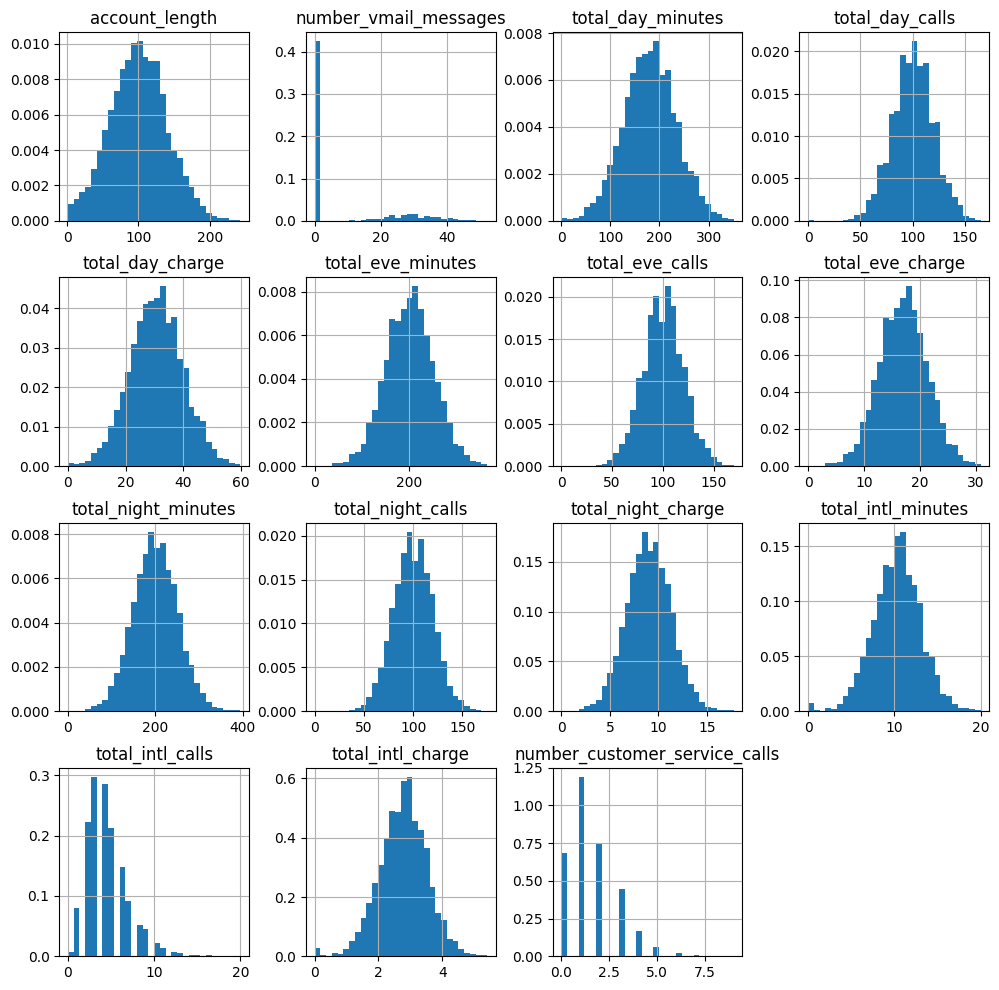

In [ ]:
df.hist(bins=30, figsize=(12,12), density=True)
plt.show()

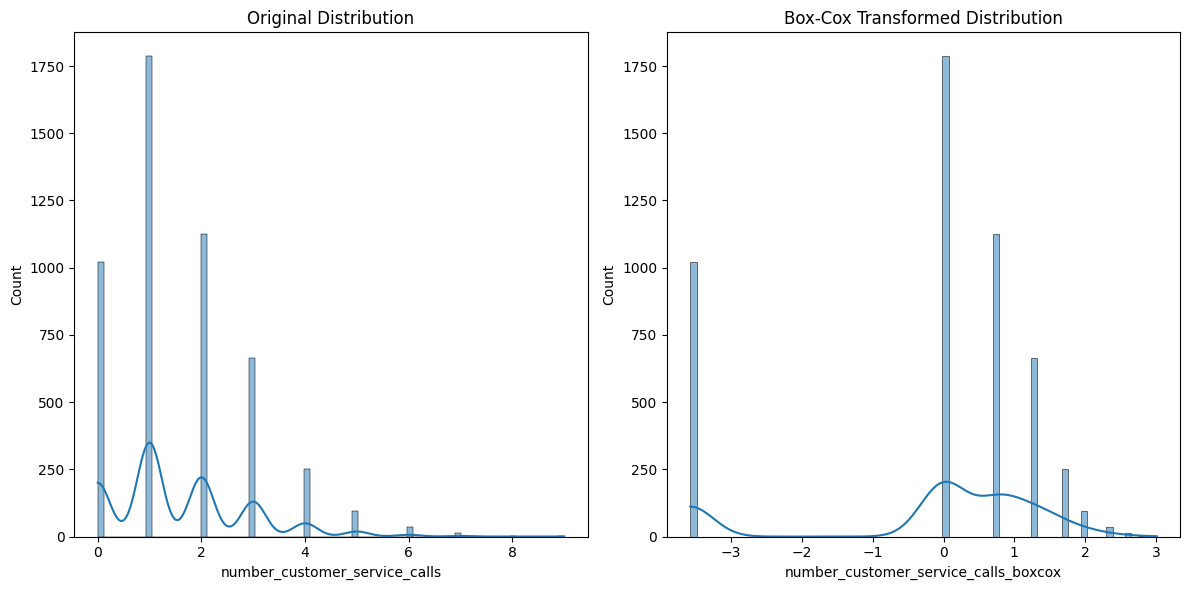

In [ ]:
# Apply Box-Cox transformation
transformed_data, lambda_val = boxcox(df['number_customer_service_calls'] + 1e-6)
df['number_customer_service_calls_boxcox'] = transformed_data

# Comparison plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['number_customer_service_calls'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['number_customer_service_calls_boxcox'], kde=True)
plt.title('Box-Cox Transformed Distribution')

plt.tight_layout()
plt.show()

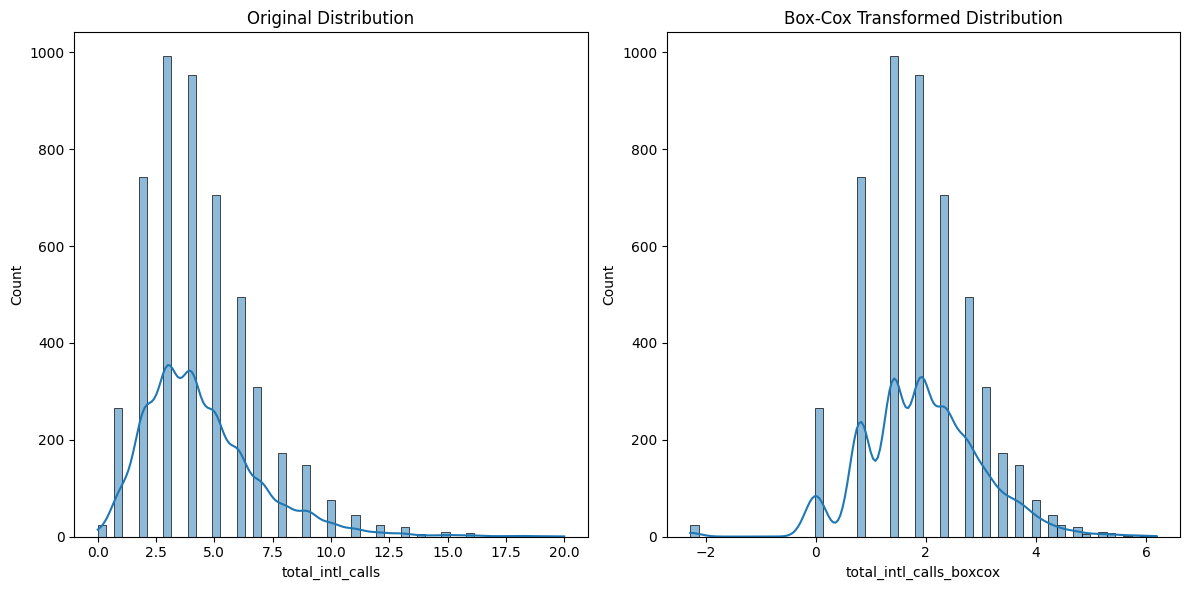

In [ ]:
# Apply Box-Cox transformation
transformed_data, lambda_val = boxcox(df['total_intl_calls'] + 1e-6)
df['total_intl_calls_boxcox'] = transformed_data

# Comparison plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['total_intl_calls'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['total_intl_calls_boxcox'], kde=True)
plt.title('Box-Cox Transformed Distribution')

plt.tight_layout()
plt.show()


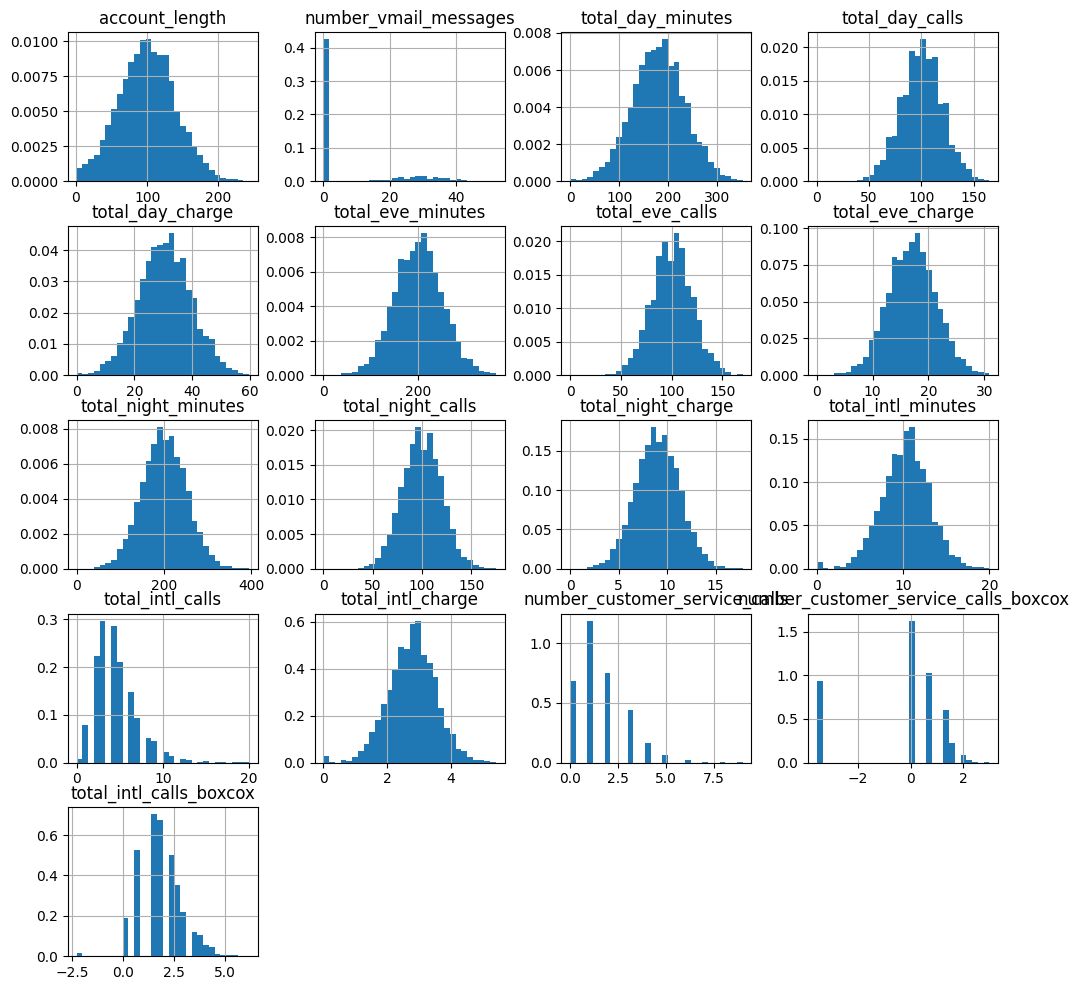

In [ ]:
df.hist(bins=30, figsize=(12,12), density=True)
plt.show()

In [ ]:
df=df.drop(['number_customer_service_calls','total_intl_calls'],axis=1)

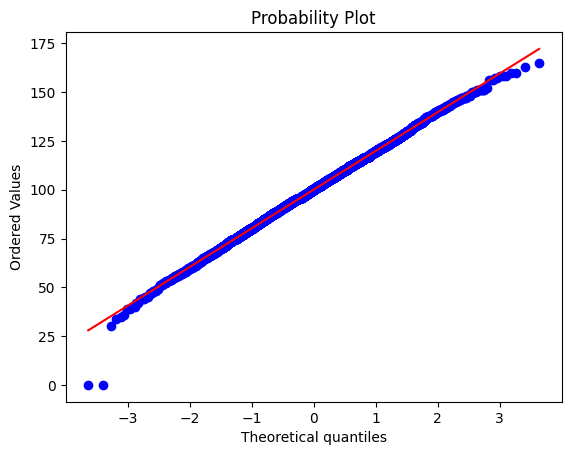

In [ ]:
import scipy.stats as stats
stats.probplot(df['total_day_calls'], dist="norm", plot=plt)
plt.show()

In [ ]:
import pandas as pd

# Define the function to count outliers based on IQR
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), column

# Get the total number of rows in the dataframe
total_rows = len(df)

# Iterate through all numerical columns and calculate outliers in percentage
outlier_percentages = {}
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    outlier_count, column_name = count_outliers(df, column)
    outlier_percentage = (outlier_count / total_rows) * 100
    outlier_percentages[column_name] = outlier_percentage

# Print the results
print("Outlier percentages for each variable:")
for column_name, outlier_percentage in outlier_percentages.items():
    print(f"Percentage of outliers in '{column_name}': {outlier_percentage:.2f}%")


Outlier percentages for each variable:
Percentage of outliers in 'account_length': 0.48%
Percentage of outliers in 'number_vmail_messages': 1.20%
Percentage of outliers in 'total_day_minutes': 0.68%
Percentage of outliers in 'total_day_calls': 0.70%
Percentage of outliers in 'total_day_charge': 0.68%
Percentage of outliers in 'total_eve_minutes': 0.86%
Percentage of outliers in 'total_eve_calls': 0.54%
Percentage of outliers in 'total_eve_charge': 0.84%
Percentage of outliers in 'total_night_minutes': 0.78%
Percentage of outliers in 'total_night_calls': 0.86%
Percentage of outliers in 'total_night_charge': 0.78%
Percentage of outliers in 'total_intl_minutes': 1.44%
Percentage of outliers in 'total_intl_charge': 1.44%
Percentage of outliers in 'number_customer_service_calls_boxcox': 23.40%
Percentage of outliers in 'total_intl_calls_boxcox': 1.48%


In [ ]:
# Function to remove outliers based on IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

# Remove outliers from the DataFrame
df_no_outliers = df.copy()  # Create a copy to avoid modifying the original DataFrame

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df_no_outliers = remove_outliers(df_no_outliers, column)

# Print the shape of the DataFrame before and after removing outliers
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")


Original DataFrame shape: (5000, 20)
DataFrame shape after removing outliers: (3496, 20)


In [ ]:
# from scipy.stats.mstats import winsorize

# def winsorize_data(data, column, limits=(0.05, 0.05)):
#     """Applies Winsorization to cap outliers at given percentile limits."""
#     data[column] = winsorize(data[column], limits=limits)  # Limits (left %, right %)
#     return data

# # Apply Winsorization to all numeric columns
# df_winsorized = df.copy()

# for column in df.select_dtypes(include=['float64', 'int64']).columns:
#     df_winsorized = winsorize_data(df_winsorized, column)

# # Print the shape of the DataFrame (same as original since no rows are removed)
# print(f"Original DataFrame shape: {df.shape}")
# print(f"DataFrame shape after Winsorization: {df_winsorized.shape}")


Original DataFrame shape: (5000, 19)
DataFrame shape after Winsorization: (5000, 19)


In [ ]:
df = df_no_outliers

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Calculate cardinality for each categorical column
cardinality = df[categorical_cols].nunique()

print("Cardinality of categorical variables:")
cardinality

Cardinality of categorical variables:


,0
state,51
area_code,3
international_plan,2
voice_mail_plan,2
churn,2


In [ ]:
# Create a deep copy of the DataFrame
data = df.copy(deep=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Identify categorical columns
categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# One-hot encode all categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Splitting into features and target variable
X = data.drop(columns=['churn'])
y = data['churn']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

print("Data Preprocessing Completed: One-Hot Encoding Applied ✅")


Data Preprocessing Completed: One-Hot Encoding Applied ✅


In [ ]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['account_length'], ax=ax1)
sns.kdeplot(x_train['total_day_minutes'], ax=ax1)
sns.kdeplot(x_train['number_customer_service_calls_boxcox'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['account_length'], ax=ax2)
sns.kdeplot(X_train_scaled['total_day_minutes'], ax=ax2)
sns.kdeplot(X_train_scaled['number_customer_service_calls_boxcox'], ax=ax2)
plt.show()

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression

# # Initialize the model
# model = RandomForestClassifier()

# # Define the number of folds for cross-validation
# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42) # setting random state for reproducibility

# # Perform k-fold cross-validation
# accuracy_scores = []
# for train_index, val_index in kf.split(X_train_scaled):
#     X_train_fold, X_val_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[val_index]
#     y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

#     model.fit(X_train_fold, y_train_fold)
#     y_pred = model.predict(X_val_fold)
#     accuracy = accuracy_score(y_val_fold, y_pred)
#     accuracy_scores.append(accuracy)

# # Print the accuracy scores for each fold
# print("Accuracy scores for each fold:", accuracy_scores)
# print("Average accuracy:", np.mean(accuracy_scores))


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# le = LabelEncoder()

# # Fit the encoder to your target variable and transform it
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

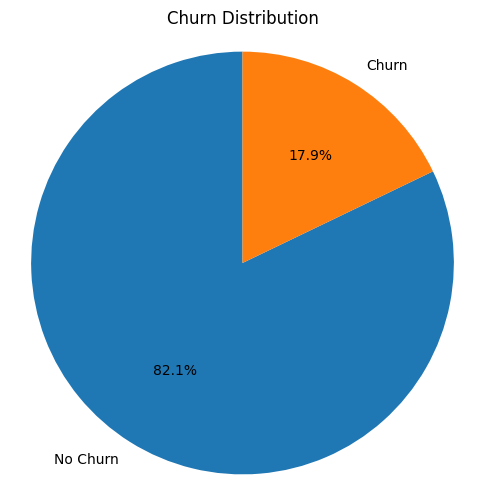

In [ ]:
# Count the occurrences of each class
churn_counts = pd.Series(y_train).value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

# Function to train and evaluate a classifier (with MCC & ROC-AUC)
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    # Predictions on training set
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_mcc = matthews_corrcoef(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]) if hasattr(clf, "predict_proba") else None

    # Predictions on test set
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_mcc = matthews_corrcoef(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) if hasattr(clf, "predict_proba") else None

    print(f"Training Accuracy: {train_accuracy:.4f}, MCC: {train_mcc:.4f}, ROC-AUC: {train_roc_auc:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}, MCC: {test_mcc:.4f}, ROC-AUC: {test_roc_auc:.4f}")
    print("\nTest Classification Report:")
    print(classification_report(y_test, y_test_pred))

    return train_accuracy, test_accuracy, train_mcc, test_mcc, train_roc_auc, test_roc_auc

# Initialize the Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Evaluate the classifier
print("Evaluating Gradient Boosting Classifier:")
train_acc, test_acc, train_mcc, test_mcc, train_roc_auc, test_roc_auc = evaluate_classifier(
    clf, X_train_scaled, y_train, X_test_scaled, y_test
)

# Display results
results = {
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc,
    'Train MCC': train_mcc,
    'Test MCC': test_mcc,
    'Train ROC-AUC': train_roc_auc,
    'Test ROC-AUC': test_roc_auc
}

print("\nClassifier Performance Summary:")
print(f"Gradient Boosting -> Train Acc: {results['Train Accuracy']:.4f}, Test Acc: {results['Test Accuracy']:.4f}, "
      f"Train MCC: {results['Train MCC']:.4f}, Test MCC: {results['Test MCC']:.4f}, "
      f"Train ROC-AUC: {results['Train ROC-AUC']:.4f}, Test ROC-AUC: {results['Test ROC-AUC']:.4f}")


# Plot feature importance for Gradient Boosting
feature_names = X_train_scaled.columns if hasattr(X_train_scaled, "columns") else range(X_train_scaled.shape[1])


Evaluating Gradient Boosting Classifier:
Training Accuracy: 0.9109, MCC: 0.6687, ROC-AUC: 0.9002
Test Accuracy: 0.8918, MCC: 0.5913, ROC-AUC: 0.8336

Test Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94       600
         yes       0.79      0.53      0.64       130

    accuracy                           0.89       730
   macro avg       0.85      0.75      0.79       730
weighted avg       0.89      0.89      0.88       730


Classifier Performance Summary:
Gradient Boosting -> Train Acc: 0.9109, Test Acc: 0.8918, Train MCC: 0.6687, Test MCC: 0.5913, Train ROC-AUC: 0.9002, Test ROC-AUC: 0.8336


In [ ]:
# Class imbalance check
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

churn
no     0.821392
yes    0.178608
Name: proportion, dtype: float64
churn
no     0.821918
yes    0.178082
Name: proportion, dtype: float64


## Balancing data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Class imbalance check
print(pd.Series(y_train_resampled).value_counts(normalize=True))

churn
no     0.5
yes    0.5
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, ADASYN
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter

# Function to train and evaluate a classifier (with MCC & ROC-AUC)
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    # Predictions on training set
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_mcc = matthews_corrcoef(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]) if hasattr(clf, "predict_proba") else None

    # Predictions on test set
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_mcc = matthews_corrcoef(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) if hasattr(clf, "predict_proba") else None

    print(f"Training Accuracy: {train_accuracy:.4f}, MCC: {train_mcc:.4f}, ROC-AUC: {train_roc_auc:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}, MCC: {test_mcc:.4f}, ROC-AUC: {test_roc_auc:.4f}")
    print("\nTest Classification Report:")
    print(classification_report(y_test, y_test_pred))

    return train_accuracy, test_accuracy, train_mcc, test_mcc, train_roc_auc, test_roc_auc

# Oversampling techniques
oversampling_methods = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE-1": BorderlineSMOTE(kind='borderline-1', random_state=42),
    "BorderlineSMOTE-2": BorderlineSMOTE(kind='borderline-2', random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    # "KMeansSMOTE": KMeansSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42)
}

# Store results for each method
all_results = {}

for method_name, sampler in oversampling_methods.items():
    print(f"\nApplying {method_name} Oversampling...")

    # Resample the training set
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_scaled, y_train)
    print(f"Class distribution after {method_name}: {Counter(y_train_resampled)}")

    # Initialize and evaluate Gradient Boosting
    clf = GradientBoostingClassifier()
    print(f"Evaluating Gradient Boosting with {method_name}:")
    train_acc, test_acc, train_mcc, test_mcc, train_roc_auc, test_roc_auc = evaluate_classifier(
        clf, X_train_resampled, y_train_resampled, X_test_scaled, y_test
    )

    # Store results
    all_results[method_name] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train MCC': train_mcc,
        'Test MCC': test_mcc,
        'Train ROC-AUC': train_roc_auc,
        'Test ROC-AUC': test_roc_auc
    }

# Display summarized results
print("\nClassifier Performance Summary with Oversampling Techniques:")
for method_name, metrics in all_results.items():
    print(f"{method_name} -> Train Acc: {metrics['Train Accuracy']:.4f}, Test Acc: {metrics['Test Accuracy']:.4f}, "
          f"Train MCC: {metrics['Train MCC']:.4f}, Test MCC: {metrics['Test MCC']:.4f}, "
          f"Train ROC-AUC: {metrics['Train ROC-AUC']:.4f}, Test ROC-AUC: {metrics['Test ROC-AUC']:.4f}")



Applying SMOTE Oversampling...
Class distribution after SMOTE: Counter({'no': 2396, 'yes': 2396})
Evaluating Gradient Boosting with SMOTE:
Training Accuracy: 0.9247, MCC: 0.8535, ROC-AUC: 0.9682
Test Accuracy: 0.8890, MCC: 0.5831, ROC-AUC: 0.8251

Test Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.96      0.93       600
         yes       0.77      0.54      0.63       130

    accuracy                           0.89       730
   macro avg       0.84      0.75      0.78       730
weighted avg       0.88      0.89      0.88       730


Applying BorderlineSMOTE-1 Oversampling...
Class distribution after BorderlineSMOTE-1: Counter({'no': 2396, 'yes': 2396})
Evaluating Gradient Boosting with BorderlineSMOTE-1:
Training Accuracy: 0.9309, MCC: 0.8662, ROC-AUC: 0.9698
Test Accuracy: 0.8959, MCC: 0.6149, ROC-AUC: 0.8280

Test Classification Report:
              precision    recall  f1-score   support

          no       0.91     